# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 100 # 32,000 it aprox.
LEARNING_RATE = 0.1
BATCH_SIZE = 512
ACTIVATION = "relu"
N_HIDDEN = [512, 256, 64, 32]
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def test_model():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512_D256_D64_D32"
    return model, model_name

def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = test_model()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/100
26/26 [==============================] - 2s 13ms/step - loss: 1.3175 - categorical_accuracy: 0.4566 - val_loss: 1.2133 - val_categorical_accuracy: 0.5664
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0891 - categorical_accuracy: 0.5623 - val_loss: 0.9470 - val_categorical_accuracy: 0.5875
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 0.8456 - categorical_accuracy: 0.6369 - val_loss: 0.7557 - val_categorical_accuracy: 0.6625
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6883 - categorical_accuracy: 0.7151 - val_loss: 0.6457 - val_categorical_accuracy: 0.6991
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6347 - categorical_accuracy: 0.7153 - val_loss: 0.6875 - val_categorical_accuracy: 0.6613
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6091 - categorical_accuracy: 0.7272 - val_loss: 0.7863 - val_categorical_accuracy: 0.6421
Epoch 7/1

26/26 [==============================] - 0s 9ms/step - loss: 0.4203 - categorical_accuracy: 0.8202 - val_loss: 0.4481 - val_categorical_accuracy: 0.7996
Epoch 51/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4050 - categorical_accuracy: 0.8240 - val_loss: 0.4945 - val_categorical_accuracy: 0.7618
Epoch 52/100
26/26 [==============================] - 0s 10ms/step - loss: 0.4314 - categorical_accuracy: 0.8091 - val_loss: 0.7121 - val_categorical_accuracy: 0.7153
Epoch 53/100
26/26 [==============================] - 0s 10ms/step - loss: 0.4625 - categorical_accuracy: 0.7986 - val_loss: 0.4547 - val_categorical_accuracy: 0.7866
Epoch 54/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4278 - categorical_accuracy: 0.8124 - val_loss: 0.5492 - val_categorical_accuracy: 0.7562
Epoch 55/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4224 - categorical_accuracy: 0.8142 - val_loss: 0.5277 - val_categorical_accuracy: 0.7699
Epoch 56/100
26

26/26 [==============================] - 0s 8ms/step - loss: 0.3827 - categorical_accuracy: 0.8352 - val_loss: 0.4924 - val_categorical_accuracy: 0.7661
Epoch 100/100
26/26 [==============================] - 0s 8ms/step - loss: 0.4299 - categorical_accuracy: 0.8081 - val_loss: 0.4379 - val_categorical_accuracy: 0.8033


## Step 7: Analyze results

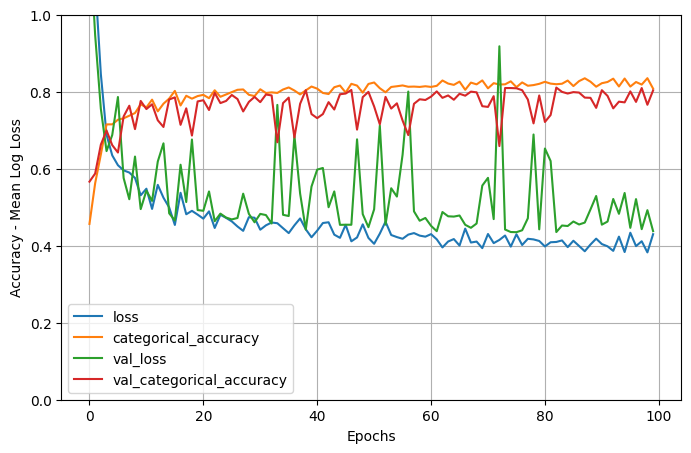

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 1)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1)
human_error = 5
bias = training_error - human_error
variance = test_error - training_error
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ",
      round(end_time - start_time), "seconds")

Error (training): 19.2 %
Error (test): 19.7 %
Bias: 14.2
Variance: 0.5
Time:  24 seconds


## Step 8: Save results